In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings as w
w.simplefilter(action = 'ignore')

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 10]
sns.set(rc = {'figure.figsize': (14, 10)})

In [2]:
train = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\train.csv\train.csv')
test = pd.read_csv(r'C:\Users\vinem\OneDrive\Рабочий стол\test.csv\test.csv')
print(train.shape, test.shape)
print('-'*10)
train.head()

(15289, 18) (10194, 17)
----------


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [3]:
train = train.drop('id', axis = 1)
test = test.drop('id', axis = 1)

In [4]:
train.info()
print('-' * 30)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

In [5]:
train.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [6]:
test.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
dtype: int64

Сhecked what type of data is present, also if there are missing values

In [7]:
train.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


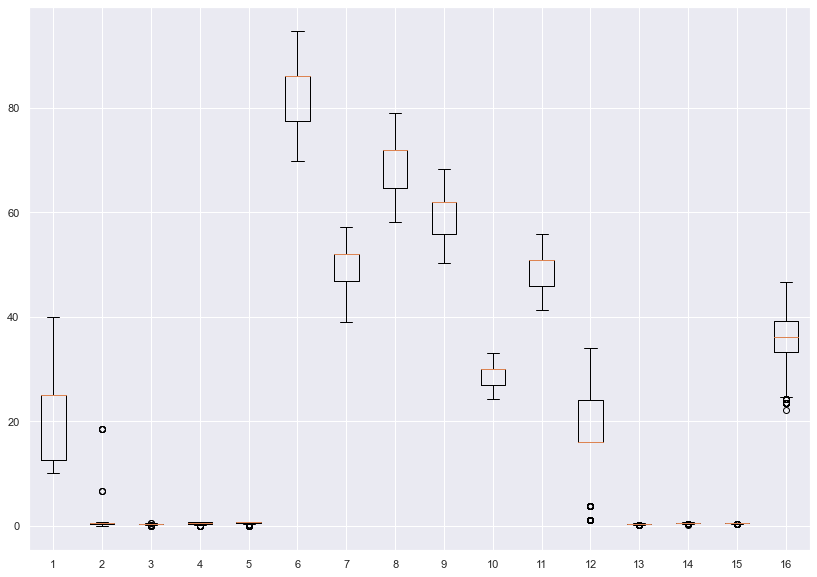

In [8]:
plt.figure(figsize = (14, 10))
plt.boxplot(train.drop('yield', axis = 1));

In [9]:
def outliners(data, col):
    Q1 = np.percentile(data[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(data[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    
    print(f'OUTLINERS {col}')
    print(f'Interquartile range: {IQR}')
    print(f'Upper bound box: {upper}')
    print(f'Lower bound box: {lower}')
    
    outline = []
    for x in data[col]:
        if x < upper and x > lower:
            outline.append(x)
        else:
            outline.append(0)
    
    data[col] = pd.DataFrame(outline)

In [10]:
outliners(train, 'honeybee')
outliners(train, 'bumbles')
outliners(train, 'andrena')
outliners(train, 'osmia')
outliners(train, 'RainingDays')
outliners(train, 'AverageRainingDays')
outliners(train, 'fruitset')
outliners(train, 'fruitmass')
outliners(train, 'seeds')

OUTLINERS honeybee
Interquartile range: 0.25
Upper bound box: 0.875
Lower bound box: -0.125
OUTLINERS bumbles
Interquartile range: 0.13
Upper bound box: 0.575
Lower bound box: 0.05499999999999999
OUTLINERS andrena
Interquartile range: 0.25
Upper bound box: 1.005
Lower bound box: 0.0050000000000000044
OUTLINERS osmia
Interquartile range: 0.25
Upper bound box: 1.125
Lower bound box: 0.125
OUTLINERS RainingDays
Interquartile range: 8.0
Upper bound box: 36.0
Lower bound box: 4.0
OUTLINERS AverageRainingDays
Interquartile range: 0.13
Upper bound box: 0.585
Lower bound box: 0.065
OUTLINERS fruitset
Interquartile range: 0.10219880399999998
Upper bound box: 0.713743449
Lower bound box: 0.30494823300000007
OUTLINERS fruitmass
Interquartile range: 0.054918046
Upper bound box: 0.556510838
Lower bound box: 0.336838654
OUTLINERS seeds
Interquartile range: 5.925788429999997
Upper bound box: 48.04692046499999
Lower bound box: 24.343766745000003


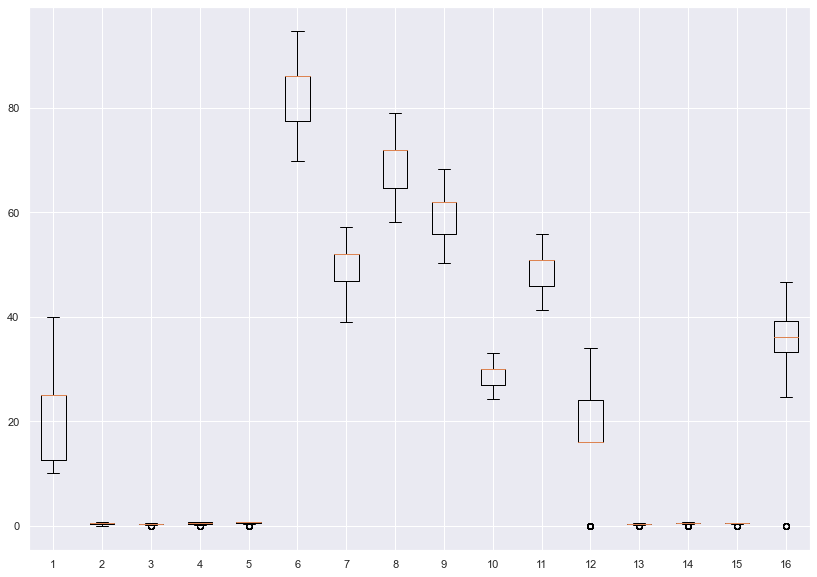

In [11]:
plt.figure(figsize = (14, 10))
plt.boxplot(train.drop('yield', axis = 1));

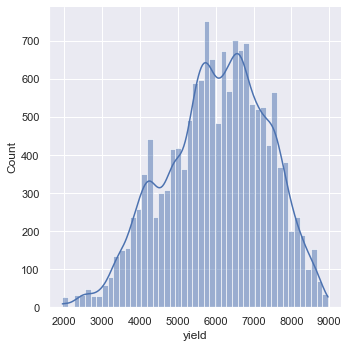

In [12]:
sns.displot(train['yield'], kde = True);

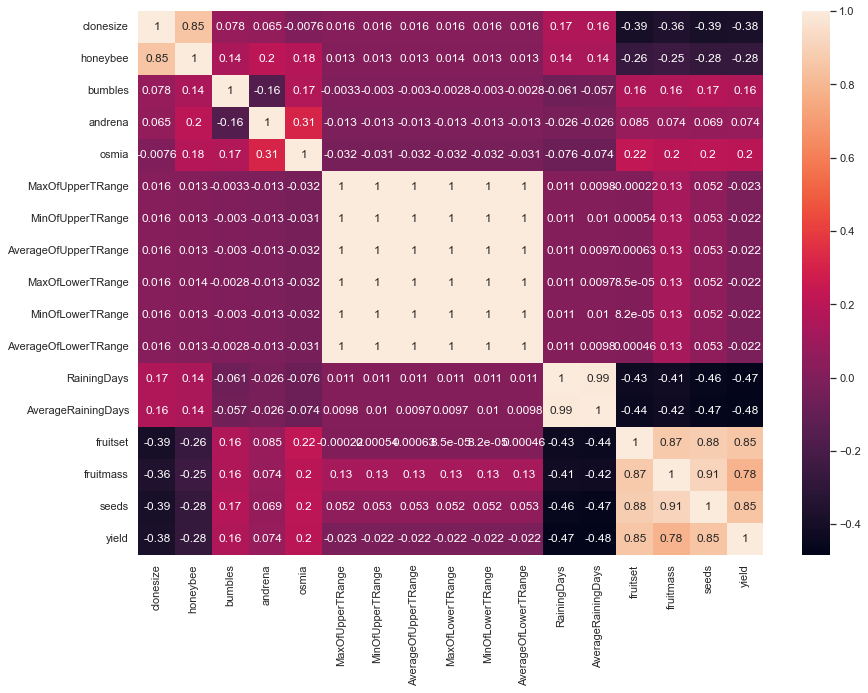

In [13]:
sns.heatmap(train.corr(), annot = True);

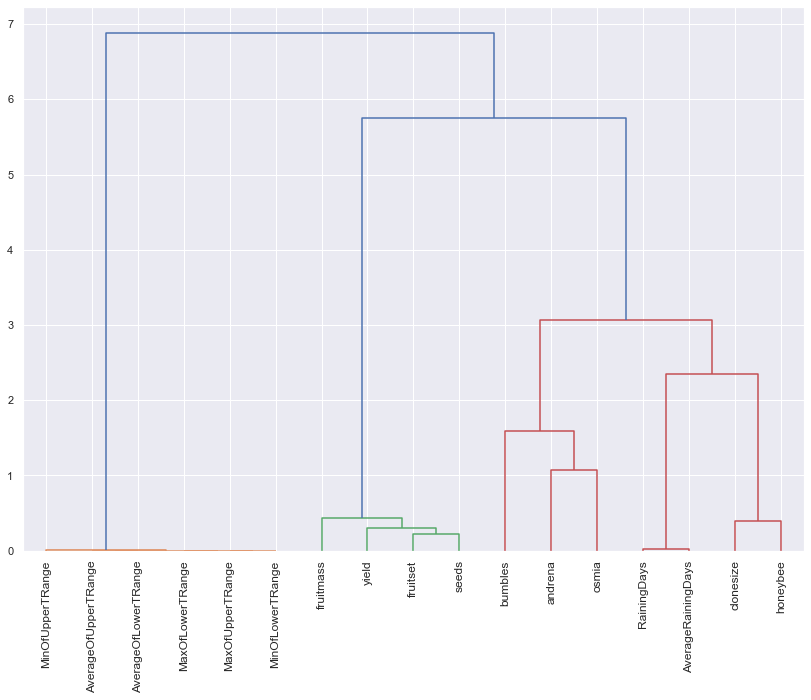

In [14]:
from scipy.cluster.hierarchy import ward, dendrogram

dist = ward(train.corr())
dendro = dendrogram(dist, labels = train.columns, leaf_rotation = 90)

In [15]:
col_drop = ['MaxOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays']

I will delete these columns because they give the same information, you can see in the graph above

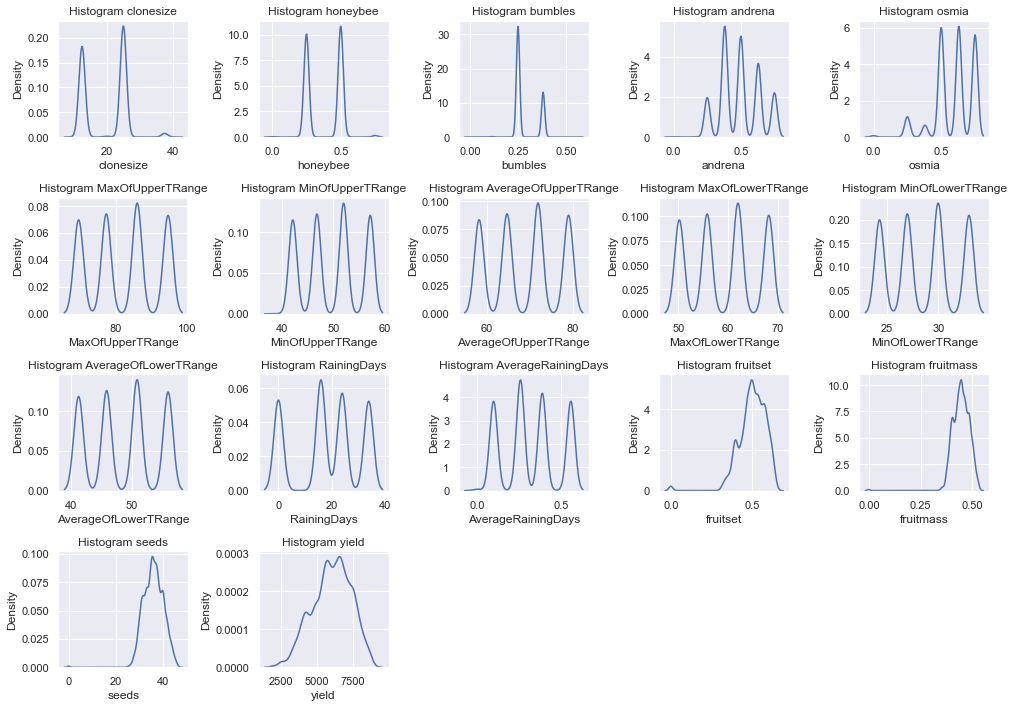

In [16]:
plotnumber = 1
for i in train.columns:
    ax = plt.subplot(4, 5, plotnumber)
    sns.kdeplot(data = train, x = i)
    plt.title(f'Histogram {i}')
    plotnumber += 1
    
plt.tight_layout()

In [17]:
def scat(data, x, y):
    sns.scatterplot(data = data, x = x, y = y)
    plt.xlabel(x)
    plt.ylabel(y)

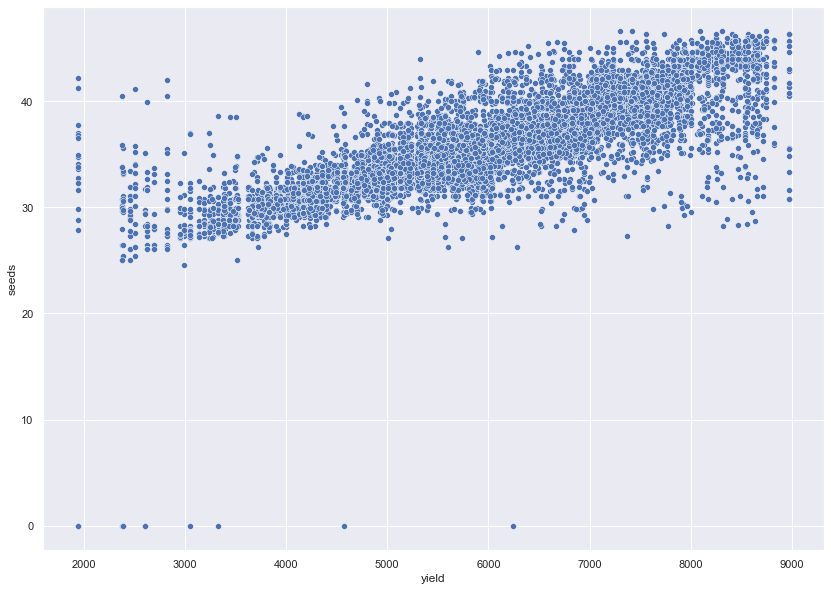

In [18]:
scat(train, 'yield', 'seeds')

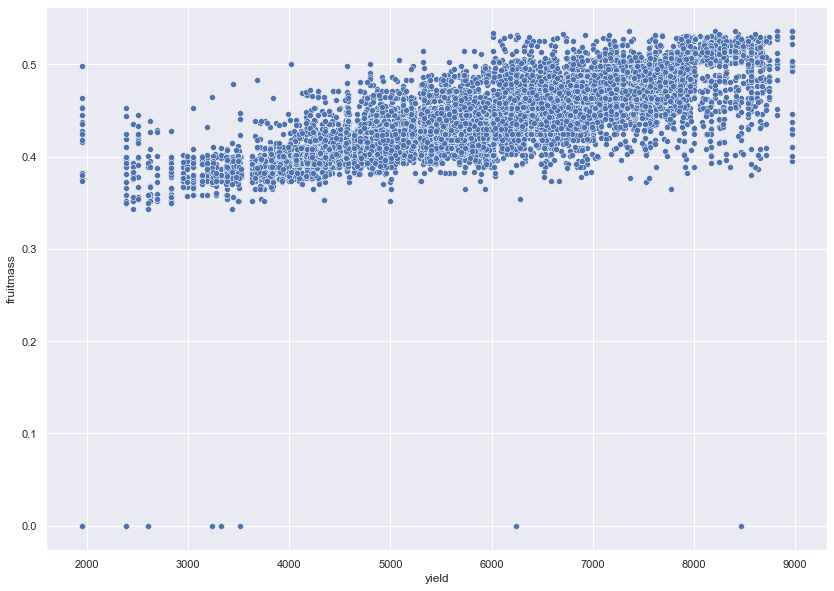

In [19]:
scat(train, 'yield', 'fruitmass')

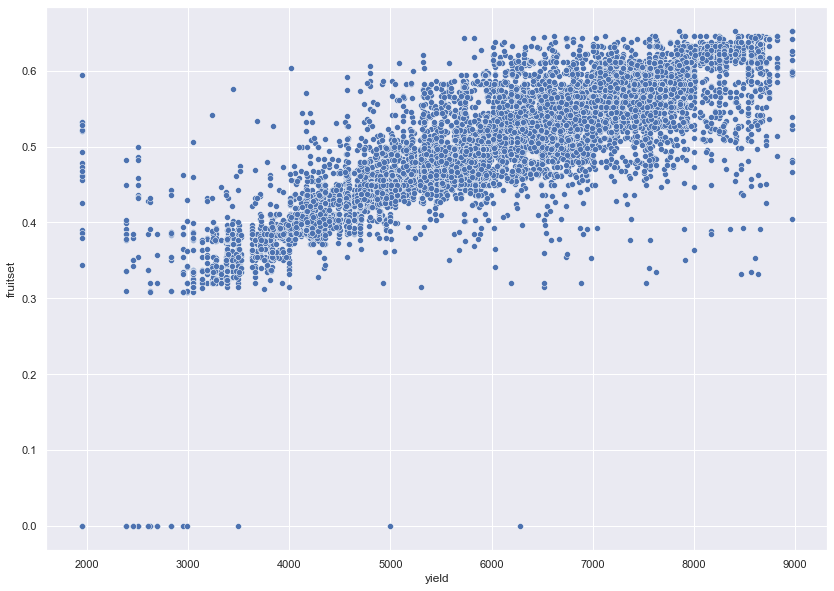

In [20]:
scat(train, 'yield', 'fruitset')

In [21]:
train = train.drop(col_drop, axis = 1)
test = test.drop(col_drop, axis = 1)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
X = train.drop('yield', axis = 1)
y = train['yield']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
parametrs_reg = {'booster': 'gblinear',
            'objective': 'reg:squarederror',
            'learning_rate': 0.1,
            'reg_alpha': 0,
            'reg_lambda': 1
            } 
parametrs_tree = {
    'booster': 'gbtree',
    'eta': 0.1,
    'max_depth': 5,
    'gamma': 1,
    'learning_rate': 0.1,
    'n_estimators': 250
}

Model results
MAE: 530.27
MSE: 504574.7
RMSE: 23.03
R2_score: 0.38
--------------------
             Test      Predict
3519   8711.20896  6712.045410
6096   5914.16491  6079.304688
895    4234.86859  4937.228027
11345  5504.75083  5898.269043
7219   3276.36206  4569.484375
13149  5946.15842  5552.305176
12423  5711.85174  6028.717773
14573  6020.87569  5676.821777
9264   4802.60430  6156.770020
9287   5862.80545  6454.331055


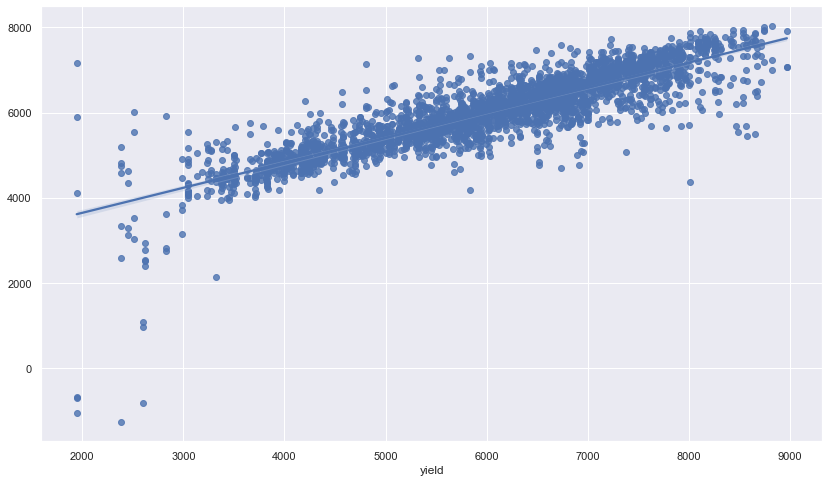

In [27]:
xgb_reg = XGBRegressor(**parametrs_reg)
xgb_reg_f = xgb_reg.fit(X_train, y_train)
ypred_reg = xgb_reg_f.predict(X_test)
print('Model results')
print('MAE:', mean_absolute_error(ypred_reg, y_test).round(2))
print('MSE:', mean_squared_error(ypred_reg, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_reg, y_test)).round(2))
print('R2_score:', r2_score(ypred_reg, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_reg
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_reg)
plt.show()

Model results
MAE: 350.69
MSE: 307181.33
RMSE: 18.73
R2_score: 0.79
--------------------
             Test      Predict
3519   8711.20896  7676.279785
6096   5914.16491  6529.636719
895    4234.86859  4419.042480
11345  5504.75083  5858.577637
7219   3276.36206  3340.160400
13149  5946.15842  5723.481934
12423  5711.85174  5755.510254
14573  6020.87569  5702.578125
9264   4802.60430  6390.166016
9287   5862.80545  6960.976562


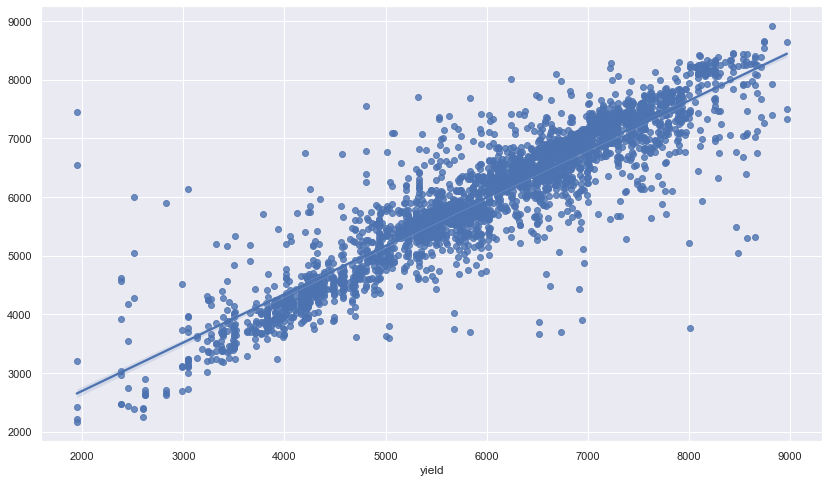

In [28]:
xgb_tree = XGBRegressor(**parametrs_tree)
xgb_tree_f = xgb_tree.fit(X_train, y_train)
ypred_tree = xgb_tree_f.predict(X_test)
print('Model results')
print('MAE:', mean_absolute_error(ypred_tree, y_test).round(2))
print('MSE:', mean_squared_error(ypred_tree, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_tree, y_test)).round(2))
print('R2_score:', r2_score(ypred_tree, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_tree
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_tree)
plt.show()

In [29]:
parametrs_cat = {
    'eval_metric': 'RMSE',
    'iterations': 1000,
    'learning_rate': 0.01,
    'l2_leaf_reg': 3,
    'max_depth': 7,
    'min_data_in_leaf': 3,
    'task_type': 'GPU'
    
}

In [30]:
import catboost as cb
cb = CatBoostRegressor(**parametrs_cat)
cb_f = cb.fit(X_train, y_train)
ypred_cb = cb_f.predict(X_test)

0:	learn: 1329.2338883	total: 27.6ms	remaining: 27.6s
1:	learn: 1318.9103140	total: 52.6ms	remaining: 26.2s
2:	learn: 1308.6894866	total: 77.8ms	remaining: 25.9s
3:	learn: 1298.6699565	total: 106ms	remaining: 26.4s
4:	learn: 1288.6168955	total: 132ms	remaining: 26.2s
5:	learn: 1278.8196995	total: 156ms	remaining: 25.9s
6:	learn: 1268.9973358	total: 180ms	remaining: 25.6s
7:	learn: 1259.4233268	total: 206ms	remaining: 25.5s
8:	learn: 1249.8889164	total: 231ms	remaining: 25.5s
9:	learn: 1240.4568426	total: 257ms	remaining: 25.4s
10:	learn: 1231.1977315	total: 281ms	remaining: 25.3s
11:	learn: 1221.9838398	total: 307ms	remaining: 25.3s
12:	learn: 1212.9281607	total: 332ms	remaining: 25.2s
13:	learn: 1203.9113907	total: 357ms	remaining: 25.1s
14:	learn: 1195.0100071	total: 382ms	remaining: 25.1s
15:	learn: 1186.2858916	total: 406ms	remaining: 25s
16:	learn: 1177.7944136	total: 430ms	remaining: 24.9s
17:	learn: 1169.2725592	total: 456ms	remaining: 24.9s
18:	learn: 1160.9049081	total: 482ms	

Model results
MAE: 350.94
MSE: 310252.94
RMSE: 18.73
R2_score: 0.78
--------------------
             Test      Predict
3519   8711.20896  7327.796319
6096   5914.16491  6563.648478
895    4234.86859  4502.192068
11345  5504.75083  5770.246396
7219   3276.36206  3510.493319
13149  5946.15842  5727.692671
12423  5711.85174  5771.649048
14573  6020.87569  5751.513905
9264   4802.60430  6407.962112
9287   5862.80545  6753.617324


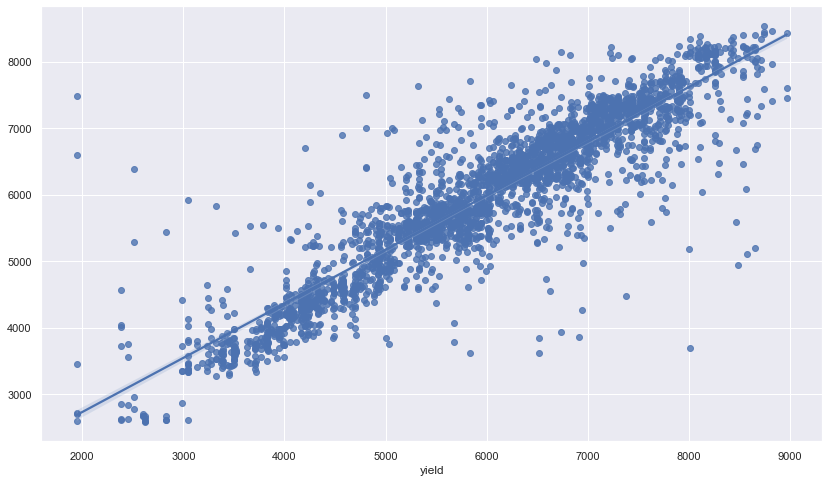

In [31]:
print('Model results')
print('MAE:', mean_absolute_error(ypred_cb, y_test).round(2))
print('MSE:', mean_squared_error(ypred_cb, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_cb, y_test)).round(2))
print('R2_score:', r2_score(ypred_cb, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_cb
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_cb)
plt.show()

Model results
MAE: 410.31
MSE: 409604.93
RMSE: 20.26
R2_score: 0.71
--------------------
             Test      Predict
3519   8711.20896  7186.434959
6096   5914.16491  6191.953832
895    4234.86859  4457.837813
11345  5504.75083  5848.803030
7219   3276.36206  4186.736740
13149  5946.15842  5471.732152
12423  5711.85174  5908.377196
14573  6020.87569  5626.150495
9264   4802.60430  6303.407899
9287   5862.80545  6633.432156


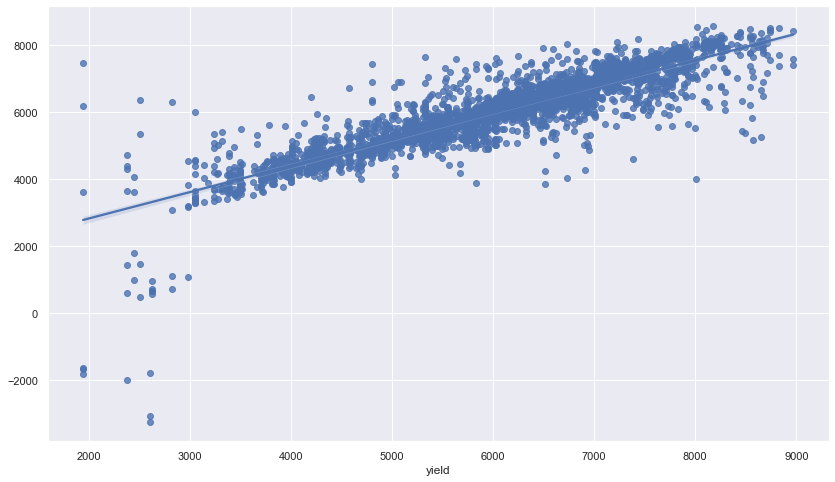

In [32]:
lr = LinearRegression()
lr_f = lr.fit(X_train, y_train)
ypred_lr = lr_f.predict(X_test)
print('Model results')
print('MAE:', mean_absolute_error(ypred_lr, y_test).round(2))
print('MSE:', mean_squared_error(ypred_lr, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_lr, y_test)).round(2))
print('R2_score:', r2_score(ypred_lr, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_lr
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_lr)
plt.show()

In [33]:
parametrs_forest = {
    'n_estimators': 1000,
    'criterion': 'squared_error',
    'max_depth': 7,
    'min_samples_split': 3,
    'min_samples_leaf': 5,
    'n_jobs': -1,
    'random_state': 42
    
}

Model results
MAE: 346.89
MSE: 311184.76
RMSE: 18.63
R2_score: 0.78
--------------------
             Test      Predict
3519   8711.20896  7614.359207
6096   5914.16491  6742.555197
895    4234.86859  4434.653809
11345  5504.75083  5790.567039
7219   3276.36206  3631.778411
13149  5946.15842  5762.479425
12423  5711.85174  5786.797194
14573  6020.87569  5774.739888
9264   4802.60430  6476.394842
9287   5862.80545  6765.139005


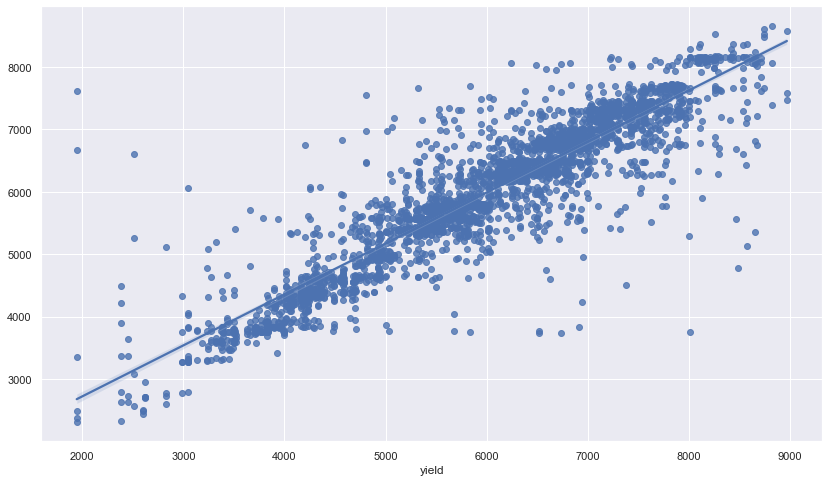

In [34]:
forest = RandomForestRegressor(**parametrs_forest)
forest_f = forest.fit(X_train, y_train)
ypred_forest = forest_f.predict(X_test)
print('Model results')
print('MAE:', mean_absolute_error(ypred_forest, y_test).round(2))
print('MSE:', mean_squared_error(ypred_forest, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_forest, y_test)).round(2))
print('R2_score:', r2_score(ypred_forest, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_forest
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_forest)
plt.show()

Model results
MAE: 454.28
MSE: 434795.67
RMSE: 21.31
R2_score: 0.7
--------------------
             Test      Predict
3519   8711.20896  7481.006118
6096   5914.16491  6855.640423
895    4234.86859  4345.729204
11345  5504.75083  5857.176205
7219   3276.36206  3472.309678
13149  5946.15842  5708.736544
12423  5711.85174  5745.450549
14573  6020.87569  5404.899290
9264   4802.60430  6411.954039
9287   5862.80545  6256.966192


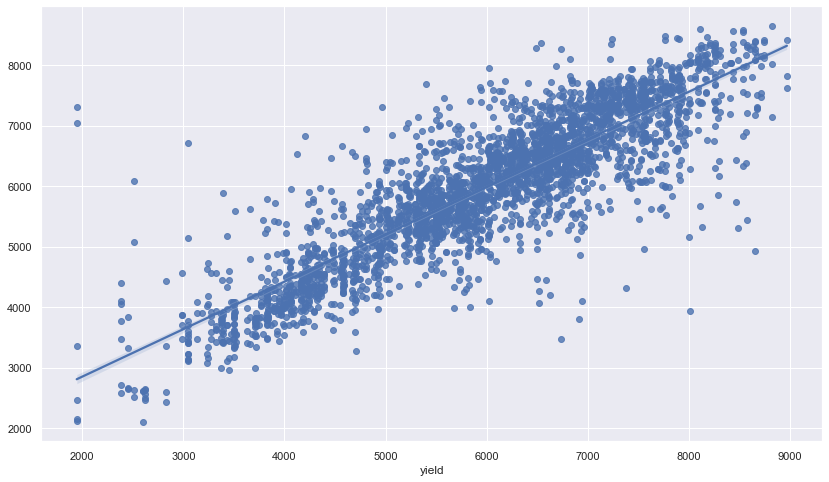

In [35]:
knn = KNeighborsRegressor(n_neighbors = 3, weights = 'distance', leaf_size = 20, 
                         n_jobs = -1)
knn_f = knn.fit(X_train, y_train)
ypred_knn = knn_f.predict(X_test)

print('Model results')
print('MAE:', mean_absolute_error(ypred_knn, y_test).round(2))
print('MSE:', mean_squared_error(ypred_knn, y_test).round(2))
print('RMSE:', np.sqrt(mean_absolute_error(ypred_knn, y_test)).round(2))
print('R2_score:', r2_score(ypred_knn, y_test).round(2))
print('-'*20)
    
df_model = pd.DataFrame({
'Test': y_test,
'Predict': ypred_knn
})
print(df_model.head(10))
    
plt.figure(figsize = (14, 8))
sns.regplot(x = y_test, y = ypred_knn)
plt.show()